# <center>***Datathon*** - *Estancia Hospitalaria*</center>
##### <center>Machine Learning </center>
***

 ### <center> ***Nuestro objetivo*** </center>

 #### <center>Generar un modelo que nos pueda ayudar a predecir si la estancia hospitalaria de los pacientes será *"corta"* o *"larga"* </center>
 ---

## <center> **Consignas a Implementar** </center>

#### <center> Procesamientos de datos </center>

#### <center> Creación de Modelo de Machine Learning </center>

---

### **Consigna 1:** **Procesamientos de datos**

--->--->--->--->--->--->--->--->--->--->--->--->

### <center> **Contamos con:** </center> 

##### <center> - Un dataset de entrenamiento "hospitalizaciones_train.csv" </center>
##### <center> - Un dataset de testeo "hospitalizaciones_test.csv" </center>

>
>
>
### Descripción de las dimensiones de nuestro dataset de ***train***

- **Available Extra Rooms in Hospital:** Habitaciones adicionales disponibles en el hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.

- **Department:** Área de atención a la que ingresa el paciente.
- **Ward_Facility_Code:** Código de la habitación del paciente.
- **Doctor_name:** Nombre de el/la doctor/a a cargo del paciente.
- **Staff_available:** Cantidad de personal disponible al momento del ingreso del paciente.
- **Patientid:** Identificador del paciente.
- **Age:** Edad del paciente.
- **Gender:** Género del paciente.
- **Type of Admission:** Tipo de ingreso registrado según la situación de ingreso del paciente.
- **Severity of Illness:** Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.
- **Health_conditions:** Condiciones de salud del paciente.
- **Visitors with Patient:** Cantidad de visitantes registrados para el paciente.
- **Insurance:** Indica si la persona posee o no seguro de salud.
- **Admission_Deposit:** Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación.
- **Stay (in days):** Días registrados de estancia hospitalaria.​

--->--->--->--->--->--->--->--->--->--->--->--->

# <center> ***EDA y ETL*** </center>

#### <center>En esta parte vamos a buscar determinar como puede influir cada dimensión o característica en el desarrollo de nuestra predicción. Viendo y detalllando el contenido de cada columna y graficando también nuestros datos para analizar. </center> 

In [1]:
#Importamos las librerías

import pandas as pd
import matplotlib.pyplot as plt

#### *Lectura del csv con la libreria Pandas*

Exploración del dataframe, vamos corroborando si la data proporcionada a la hora de la consigna coincide con los atributos de nuestro dataset

In [2]:
registros_hosp = pd.read_csv('https://raw.githubusercontent.com/DanielaCoVi/Datathon/main/hospitalizaciones_train.csv')

registros_hosp.head(5)


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


#### Revisando el contenido con 
## ***.info()***

Una primera inmersión en nuestra data

In [3]:
registros_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

#### Empiezo analizando la data, viendo que valores me aporta en particular cada columna y asi con cuáles voy a trabajar para el modelo de predicción
#### Esto me permite ver los parámetro con los que cuenta cada dimensión y como puedo realizar más adelante la transformación de esta data para poder emplearla de manera más acertiva en el modelo a implementar

## ***.unique()***

#### ---> Lo incluire pues para las hospitalizaciones deben tener el factor de cuartos disponibles.

In [4]:
registros_hosp['Available Extra Rooms in Hospital'].unique()

array([ 4,  2,  7,  3,  5, 10,  6,  1, 21,  8, 11, 13,  9, 14, 24,  0, 12,
       20], dtype=int64)

#### ---> La especialidad nos puede dar una pauta para la internación.

In [5]:
registros_hosp['Department'].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

#### ---> La cantidad de personal sí puede ser una variable importante pues se debe contar con la cantidad de personal adecuada para la debida atención.

In [6]:
registros_hosp['staff_available'].unique()

array([ 0,  2,  8,  7, 10,  5,  9,  3,  6,  4,  1], dtype=int64)

#### ---> La edad del paciente será una  de las pautas sobre la evolución de su recuperación y asi permanencia de hospitalización.

In [7]:
registros_hosp['Age'].unique()

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

#### ---> Su tipo de admisión nos dara una idea de cual fue el grado de alerta para su hospitalización.

In [8]:
registros_hosp['Type of Admission'].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

#### ---> Aquí podemos apreciar la gravedad del estado de salud del paciente cuando llegó lo cual se puede considerar un factor importante para determinar el tiempo de hospitalización.

In [9]:
registros_hosp['Severity of Illness'].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

#### ---> Su condición de salud determinada previamente y el grado en que la enfermedad se encuentre según su historial también sera un factor a considerar.

In [10]:
registros_hosp['health_conditions'].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

#### ---> La pauta de si cuenta con seguro o no puede determinar su periódo de estancia, así que sera un factor a tomar en cuenta.

In [11]:
registros_hosp['Insurance'].unique()

array(['Yes', 'No'], dtype=object)

#### Con lo observado  hasta el momento dropearemos las columnas que no son determinantes para hallar la duración de la estancia:

In [12]:
Hospitalizaciones = registros_hosp.drop(['Ward_Facility_Code', 'doctor_name', 'patientid', 'gender', 'Visitors with Patient', 'Admission_Deposit'], axis=1 )
Hospitalizaciones


,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
0,4,gynecology,0,41-50,Trauma,Extreme,Diabetes,Yes,8
1,4,gynecology,2,31-40,Trauma,Minor,Heart disease,No,9
2,2,gynecology,8,21-30,Trauma,Extreme,Diabetes,Yes,7
3,4,gynecology,7,31-40,Urgent,Moderate,None,No,8
4,2,anesthesia,10,71-80,Trauma,Moderate,Diabetes,No,34
...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,1,31-40,Trauma,Minor,Asthama,Yes,8
409996,5,gynecology,5,21-30,Trauma,Extreme,Other,No,9
409997,4,gynecology,9,21-30,Emergency,Minor,Asthama,Yes,9
409998,10,gynecology,10,21-30,Trauma,Moderate,Other,Yes,9


## ***Graficamos para observar claramente la correlación de las dimensiones que conservamos.***

--->--->--->--->--->--->

## *Mapa de calor*

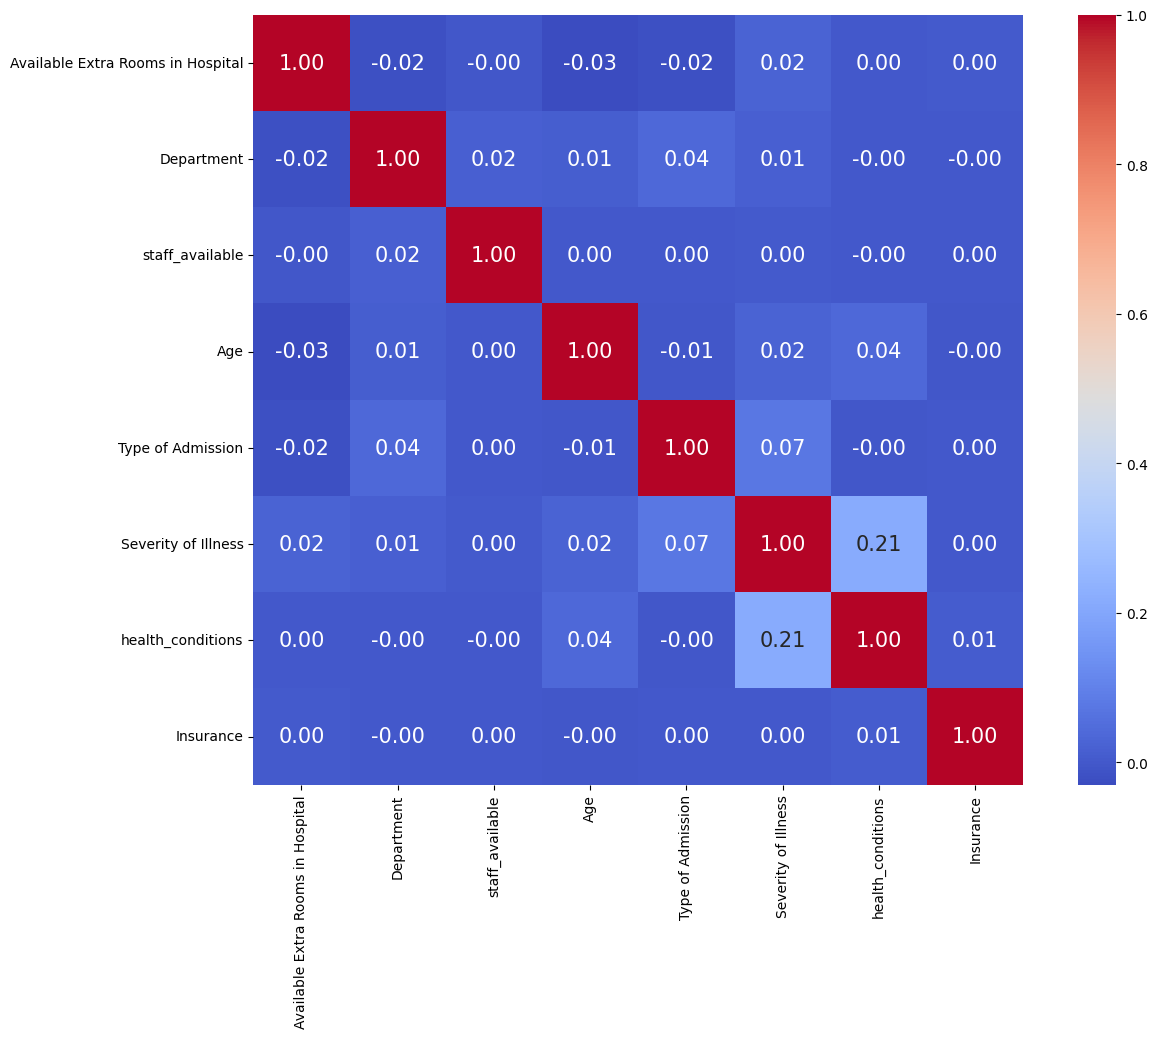

In [60]:
import seaborn as sns

# Hacemos un mapa de calor

corr = Hospitalizaciones.drop(columns = ['Stay (in days)']).corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= Hospitalizaciones.drop(columns = ['Stay (in days)']).columns, 
           yticklabels= Hospitalizaciones.drop(columns = ['Stay (in days)']).columns,
           cmap= 'coolwarm')

plt.show()

## *Pairplot*

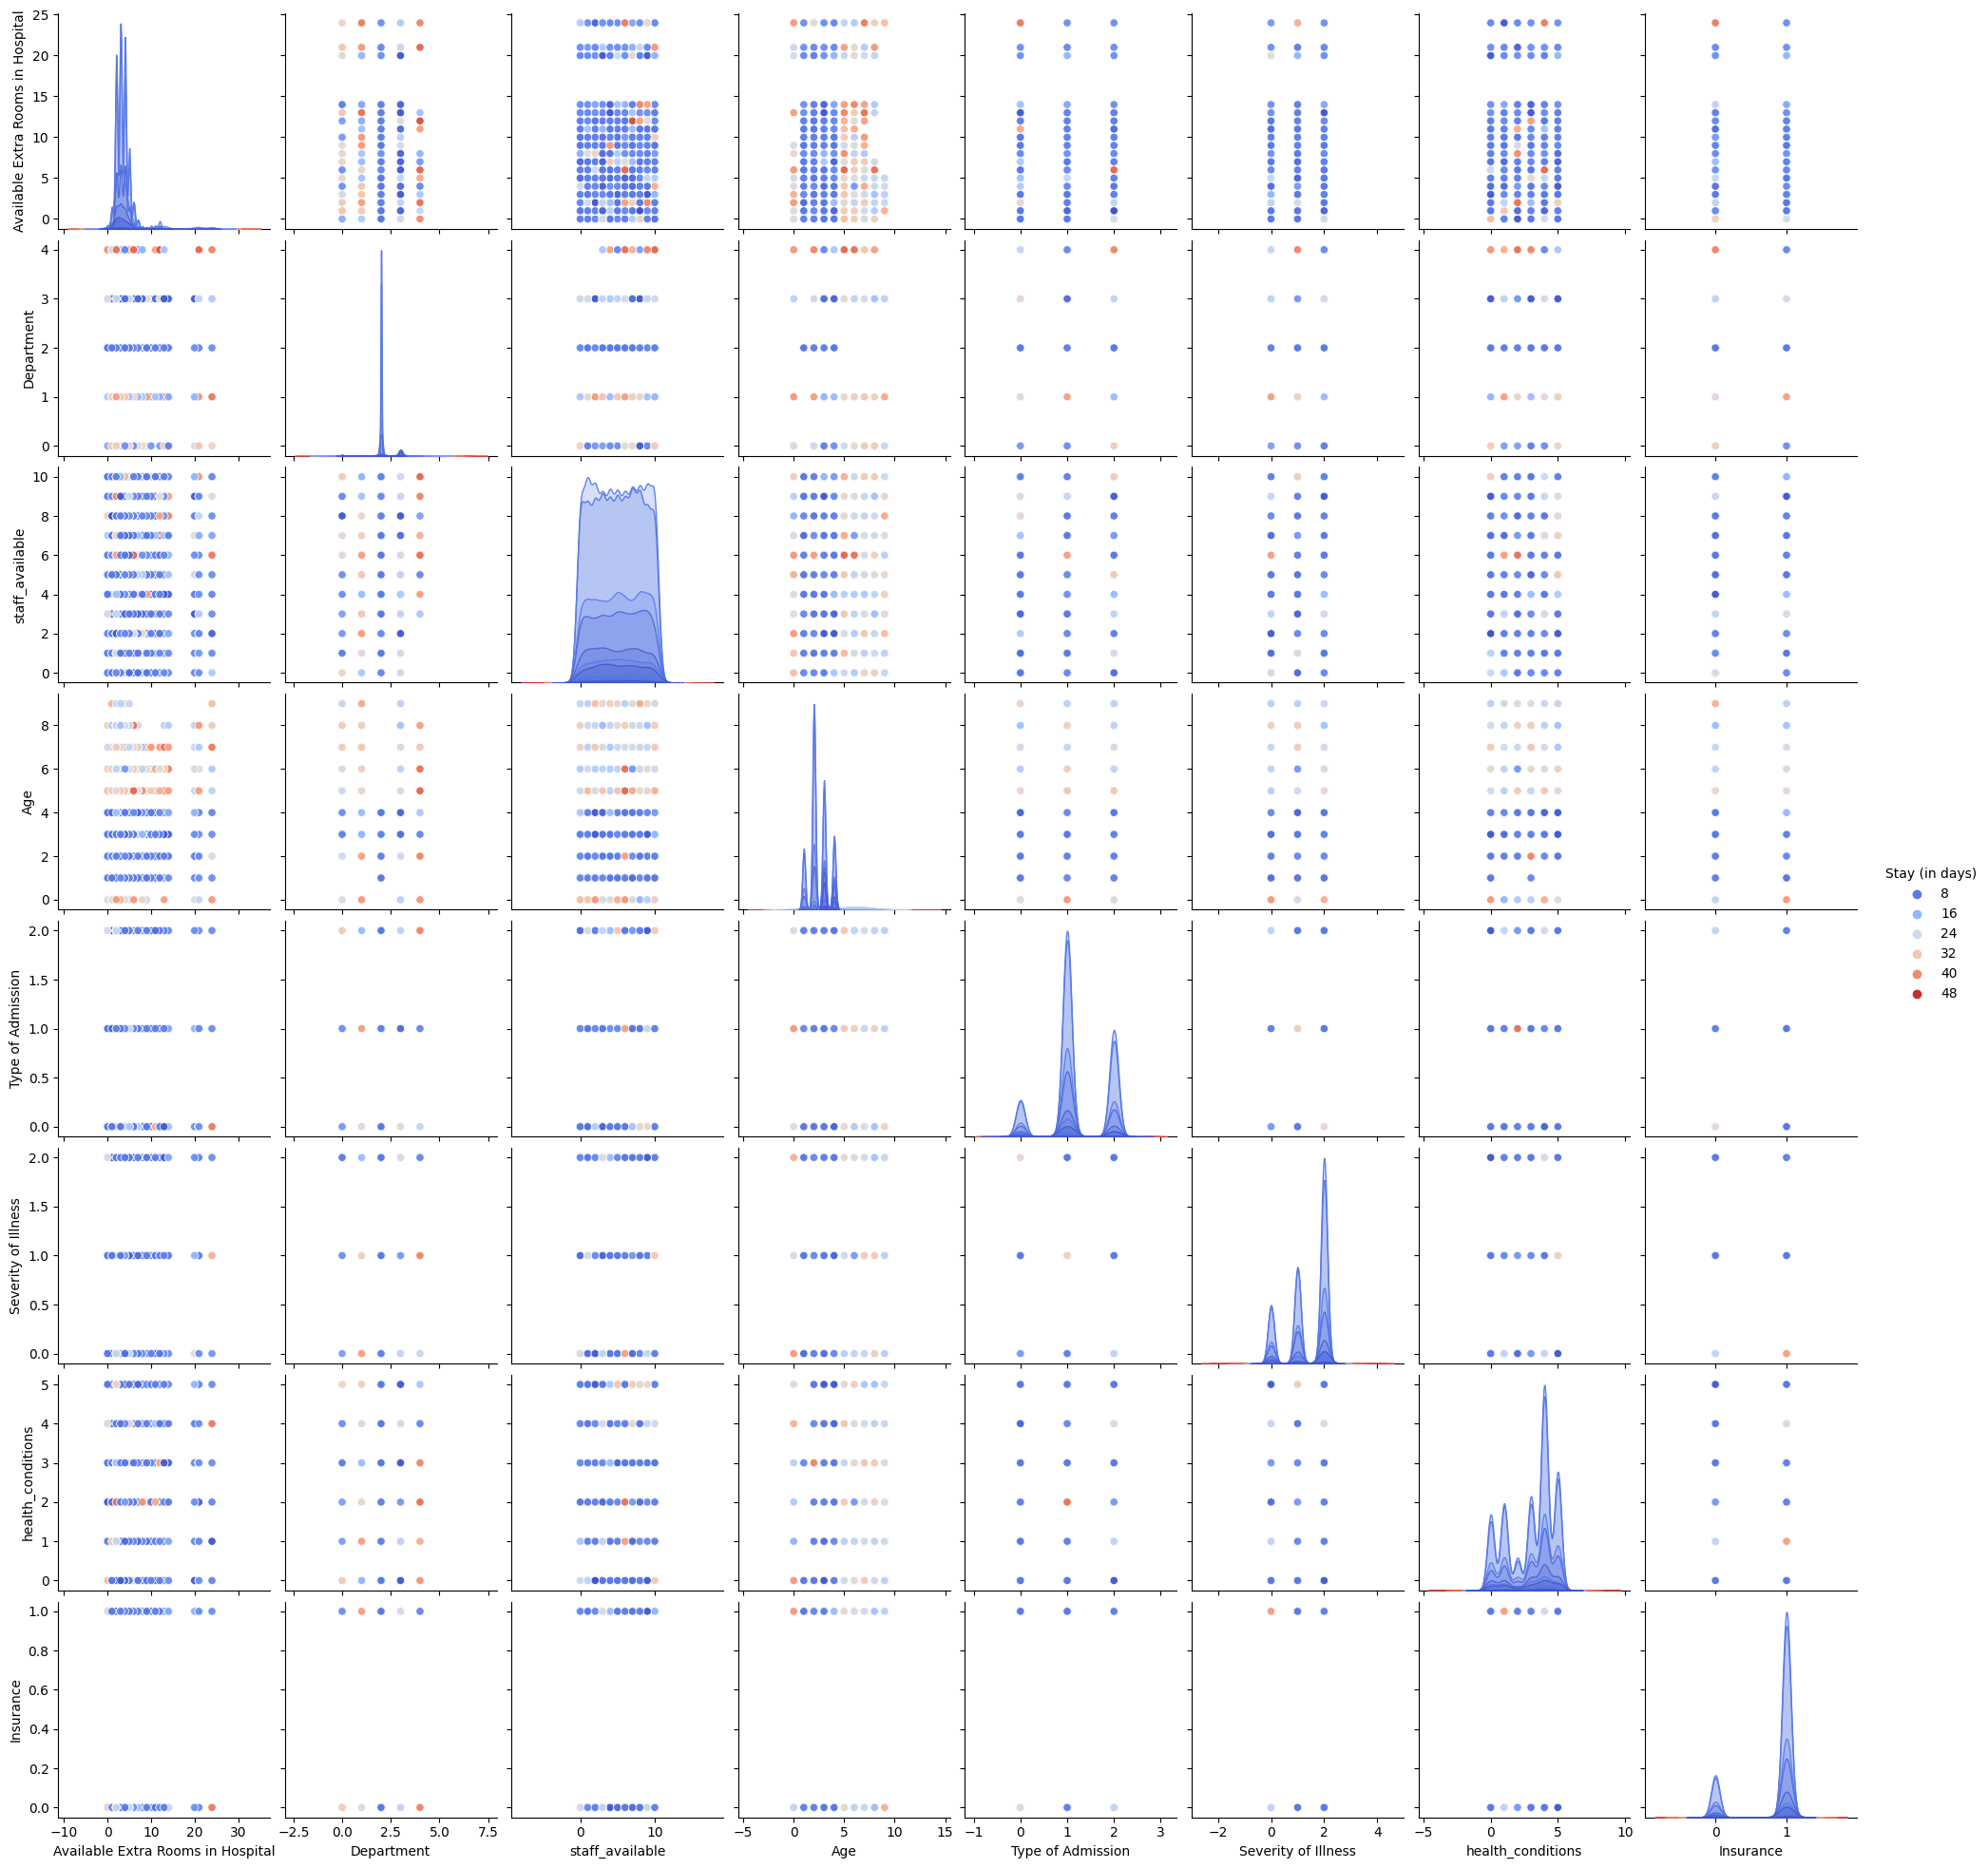

In [61]:
# Hacemos un pairplot para ver la correlación entre las variables

sns.pairplot(Hospitalizaciones.sample(frac = 0.1), hue = 'Stay (in days)', palette='coolwarm')
plt.show()

In [62]:
Hospitalizaciones.corr()

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.021235,-0.003064,-0.029921,-0.020866,0.024045,0.001643,0.002438,-0.019383
Department,-0.021235,1.000000,0.016304,0.013096,0.037395,0.014698,-0.000344,-0.000714,-0.204050
staff_available,-0.003064,0.016304,1.000000,0.001818,0.002255,0.002759,-0.001500,0.001245,0.006673
Age,-0.029921,0.013096,0.001818,1.000000,-0.005304,0.023350,0.037140,-0.002472,0.585201
Type of Admission,-0.020866,0.037395,0.002255,-0.005304,1.000000,0.070795,-0.001768,0.002062,-0.035811
Severity of Illness,0.024045,0.014698,0.002759,0.023350,0.070795,1.000000,0.214291,0.001924,0.024316
health_conditions,0.001643,-0.000344,-0.001500,0.037140,-0.001768,0.214291,1.000000,0.008702,0.001772
Insurance,0.002438,-0.000714,0.001245,-0.002472,0.002062,0.001924,0.008702,1.000000,-0.000947
Stay (in days),-0.019383,-0.204050,0.006673,0.585201,-0.035811,0.024316,0.001772,-0.000947,1.000000


## *Gestión de características categóricas*

--->--->--->--->--->--->

### Utilizamos:

#### **'LabelEncoder'** para las variables categóricas nominales.
#### **'OrdinalEncoder'** para las variables categóricas ordinales, las cuales cuentan con la característica que pueden ser priorizadas por su valor jerárquico

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [14]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Department'

lb = LabelEncoder() 
Hospitalizaciones['Department'] = lb.fit_transform(Hospitalizaciones['Department'])

In [15]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Age'

lb1 = LabelEncoder() 
Hospitalizaciones['Age'] = lb1.fit_transform(Hospitalizaciones['Age'])

In [16]:
#Instanciamos el modelo, utilizamos el ordinal encoder para el feature 'Type of Admission'

enc = OrdinalEncoder(categories=[['Urgent', 'Trauma', 'Emergency']])

Hospitalizaciones['Type of Admission'] = enc.fit_transform(Hospitalizaciones[['Type of Admission']] )

In [17]:
#Instanciamos el modelo, utilizamos el ordinal encoder para el feature 'Severity of Illness'

enc = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])

Hospitalizaciones['Severity of Illness'] = enc.fit_transform(Hospitalizaciones[['Severity of Illness']] )

In [18]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'health_conditions'

lb2 = LabelEncoder() 
Hospitalizaciones['health_conditions'] = lb2.fit_transform(Hospitalizaciones['health_conditions'])

In [19]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Insurance'

lb3 = LabelEncoder() 
Hospitalizaciones['Insurance'] = lb3.fit_transform(Hospitalizaciones['Insurance'])


#### Aqui transformamos nuestra columna de salida ***"Stay (in days)"*** en dos grupos: El "0" para estancias cortas (límite 8 días) y "1" para estancias largas (de 9 días en adelante).

In [20]:
Hospitalizaciones['Stay (in days)'] = pd.cut(x = Hospitalizaciones['Stay (in days)'], bins = [Hospitalizaciones['Stay (in days)'].min()-1, 8, Hospitalizaciones['Stay (in days)'].max()+1 ], labels= ['0', '1'])

### *Dataframe de entrenamiento final*

In [21]:
Hospitalizaciones

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
0,4,2,0,4,1.0,2.0,1,1,0
1,4,2,2,3,1.0,0.0,2,0,1
2,2,2,8,2,1.0,2.0,1,1,0
3,4,2,7,3,0.0,1.0,4,0,0
4,2,1,10,7,1.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
409995,1,2,1,3,1.0,0.0,0,1,0
409996,5,2,5,2,1.0,2.0,5,0,1
409997,4,2,9,2,2.0,0.0,0,1,1
409998,10,2,10,2,1.0,1.0,5,1,1


### Tratamos el Dataset de Test porque, para hallar la predicción debe poseer las mismas variables. 

--->--->--->--->--->--->

#### *Lectura del Dataset de testeo*

In [22]:
registros_hosp2 = pd.read_csv('https://raw.githubusercontent.com/DanielaCoVi/Datathon/main/hospitalizaciones_test.csv')

registros_hosp2.head(5)


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


#### *Dropeamos para lograr la misma cantidad de feautures que en el primer dataset*

In [23]:
Hospitalizaciones_test = registros_hosp2.drop(['Ward_Facility_Code', 'doctor_name', 'patientid', 'gender', 'Visitors with Patient', 'Admission_Deposit'], axis=1 )
Hospitalizaciones_test


,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance
0,3,gynecology,10,21-30,Trauma,Moderate,Other,No
1,2,TB & Chest disease,4,51-60,Trauma,Moderate,Asthama,Yes
2,2,radiotherapy,7,51-60,Trauma,Moderate,None,No
3,2,gynecology,1,21-30,Trauma,Moderate,None,Yes
4,2,anesthesia,7,51-60,Trauma,Extreme,Diabetes,No
...,...,...,...,...,...,...,...,...
89995,4,gynecology,2,11-20,Trauma,Minor,High Blood Pressure,No
89996,13,gynecology,8,31-40,Emergency,Moderate,Other,No
89997,2,gynecology,3,11-20,Emergency,Moderate,High Blood Pressure,No
89998,2,radiotherapy,1,61-70,Trauma,Extreme,Diabetes,No


### *Gestión de características categóricas*

In [24]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Department'

lb4 = LabelEncoder() 
Hospitalizaciones_test['Department'] = lb4.fit_transform(Hospitalizaciones_test['Department'])

In [25]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Age'

lb5 = LabelEncoder() 
Hospitalizaciones_test['Age'] = lb5.fit_transform(Hospitalizaciones_test['Age'])

In [26]:
#Instanciamos el modelo, utilizamos el ordinal encoder para el feature 'Type of Admission'

enc1 = OrdinalEncoder(categories=[['Urgent', 'Trauma', 'Emergency']])

Hospitalizaciones_test['Type of Admission'] = enc1.fit_transform(Hospitalizaciones_test[['Type of Admission']] )

In [27]:
#Instanciamos el modelo, utilizamos el ordinal encoder para el feature 'Severity of Illness'

enc2 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])

Hospitalizaciones_test['Severity of Illness'] = enc2.fit_transform(Hospitalizaciones_test[['Severity of Illness']] )

In [28]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'health_conditions'

lb6 = LabelEncoder() 
Hospitalizaciones_test['health_conditions'] = lb6.fit_transform(Hospitalizaciones_test['health_conditions'])

In [29]:
#Instanciamos el modelo, utilizamos el label encoder para el feature 'Insurance'

lb7 = LabelEncoder() 
Hospitalizaciones_test['Insurance'] = lb7.fit_transform(Hospitalizaciones_test['Insurance'])


### *Dataframe final de Test listo para probarse...* 

In [30]:
Hospitalizaciones_test

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance
0,3,2,10,2,1.0,1.0,5,0
1,2,0,4,5,1.0,1.0,0,1
2,2,3,7,5,1.0,1.0,4,0
3,2,2,1,2,1.0,1.0,4,1
4,2,1,7,5,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...
89995,4,2,2,1,1.0,0.0,3,0
89996,13,2,8,3,2.0,1.0,5,0
89997,2,2,3,1,2.0,1.0,3,0
89998,2,3,1,6,1.0,2.0,1,0


### **Consigna 2:** **Creación de Modelo de Machine Learning**

--->--->--->--->--->--->--->--->--->--->--->--->

# *A modelar...*

### Librerias a utilizar

In [31]:
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.tree import DecisionTreeClassifier 

import numpy as np

### Declarando nuestras variables para el modelo de entrenamiento

#### Primera prueba 

In [ ]:
X = Hospitalizaciones.drop(['Stay (in days)'], axis=1)
y = Hospitalizaciones['Stay (in days)']

#### Segunda prueba 

In [41]:
X = Hospitalizaciones[['Severity of Illness', 'Age']]
y = Hospitalizaciones['Stay (in days)']

#### Tercera prueba 

In [32]:
X = Hospitalizaciones.drop(['Stay (in days)', 'Insurance'], axis=1)
y = Hospitalizaciones['Stay (in days)']

### *Train_test_split*

In [33]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

## ***Modelo : Árbol de decisión***

In [34]:
# Se define el clasificador
dtc = DecisionTreeClassifier(max_depth=14)

# Se entrena el modelo
dtc.fit(X_train, y_train)

# Predicciones
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Desempeño del modelo entrenado, calculando la precisión (accuracy)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo testeado, calculando la precisión (accuracy)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',dt_train_accuracy)
print('Desempeño del modelo para el Test set: ',dt_test_accuracy)

Desempeño del modelo para el Training set:  0.7055701219512195
Desempeño del modelo para el Test set:  0.6998780487804878


### *Recall*

In [35]:
# Desempeño del modelo en test, calculando el recall
arbol_test_recall = recall_score(y_test, y_test_pred, average= None)
arbol_test_recall

array([0.43752628, 0.85866139])

## ***Usamos el modelo entrenado de Árbol de decisión - Hospitalizaciones_test***

#### *Definimos X.* Estos datos provienen del segundo dataset donde queremos averiguar la duración de la estancia.

#### Primera prueba

In [36]:
X_test_final = Hospitalizaciones_test

#### Segunda prueba

In [88]:
X_2 = Hospitalizaciones_test[['Severity of Illness', 'Age']]

#### Tercera prueba para test con las feautures con más correlación

In [37]:
X_test_final2 = Hospitalizaciones_test.drop(['Insurance'], axis=1)

#### *Predicción*

#### Lo anexamos a unuestro dataframe de test

#### Se fue reemplazando el csv, me quede con el tercer intento pues obtuvo mejores métricas

In [208]:

Hospitalizaciones_test['pred'] = dtc.predict(X_test_final)


In [90]:
prediccion_2 = dtc.predict(X_2)
prediccion_2

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [38]:
prediccion_3 = dtc.predict(X_test_final2)

In [39]:
Hospitalizaciones_test

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance
0,3,2,10,2,1.0,1.0,5,0
1,2,0,4,5,1.0,1.0,0,1
2,2,3,7,5,1.0,1.0,4,0
3,2,2,1,2,1.0,1.0,4,1
4,2,1,7,5,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...
89995,4,2,2,1,1.0,0.0,3,0
89996,13,2,8,3,2.0,1.0,5,0
89997,2,2,3,1,2.0,1.0,3,0
89998,2,3,1,6,1.0,2.0,1,0


#### Luego volvemos *dataframe* nuestra predicción 

In [209]:
pred_resuelto = pd.DataFrame(Hospitalizaciones_test['pred'])

In [ ]:
prediccion_2_f =pd.DataFrame(prediccion_2)
prediccion_2_f

In [40]:
prediccion_3_f =pd.DataFrame(prediccion_3)
prediccion_3_f

,0
0,1
1,1
2,1
3,1
4,1
...,...
89995,1
89996,1
89997,1
89998,1


### *por último lo volvemos CSV*

#### Primera predicción

In [210]:
ruta = 'D:/Berenice/Datathon_Lab/DanielaCoVi.csv'
pred_resuelto.to_csv(ruta, index=False, encoding='utf-8')

#### segunda predicción 

In [93]:
ruta = 'D:/Berenice/Datathon_Lab/DanielaCoVi.csv'
prediccion_2_f.to_csv(ruta, index=False, encoding='utf-8')

#### Tercera predicción

In [41]:
ruta = 'D:/Berenice/Datathon_Lab/DanielaCoVi.csv'
prediccion_3_f.to_csv(ruta, index=False, encoding='utf-8')